# imports

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import pickle
import random

# data downloading

In [2]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d sroy93/bollywood-celeb-localized-face-dataset-extended
! unzip "/content/bollywood-celeb-localized-face-dataset-extended.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/dataset/Prabhas/Prabhas.198.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.21.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.211.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.217.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.22.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.221.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.223.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.226.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.227.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.232.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.238.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.24.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.244.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.250.jpg  
  inflating: /content/dataset/dataset/Prabhas/Prabhas.25

# data loading

In [3]:
os.mkdir("New_Data")
counter = 0

In [4]:
data_directory = "/content/dataset/dataset"
new_data_directory = "/content/New_Data/"

for cls in os.listdir(data_directory):
    path = os.path.join(data_directory, cls)
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        new_file_name = f"{counter}.jpg"
        new_file_path = os.path.join(new_data_directory, new_file_name)
        shutil.move(file_path, new_file_path)
        counter += 1
        break

In [5]:
data_directory = "/content/New_Data"
images_paths = sorted([os.path.join(data_directory, fname)for fname in os.listdir(data_directory)])

# Data Visulization

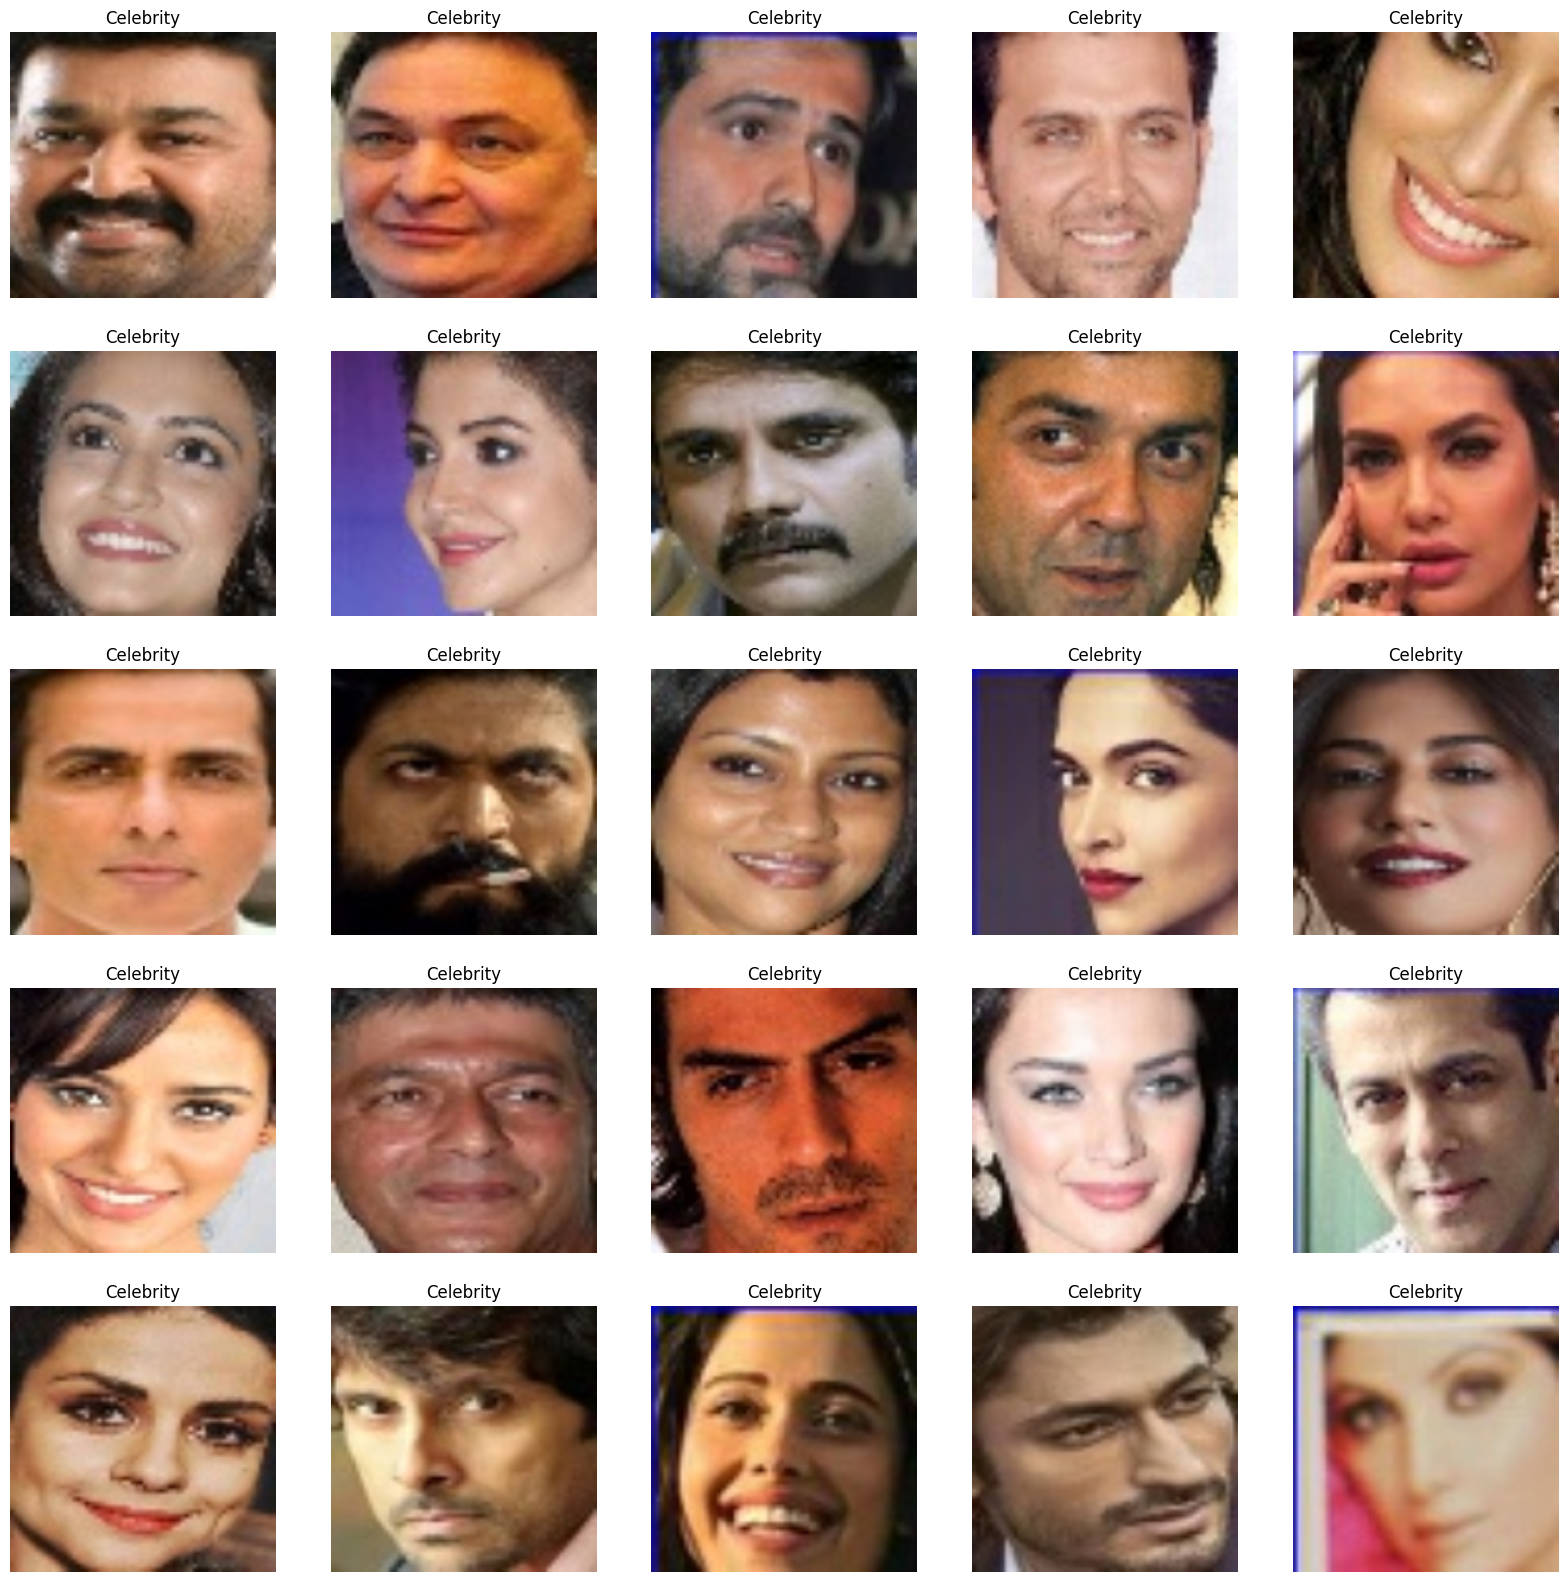

In [8]:
IMG_SIZE = 224

random_images = random.sample(images_paths, 25)
plt.figure(figsize=(20, 20))
for i in range(25):
  plt.subplot(5, 5, i+1, xticks=[], yticks=[])
  image = tf.io.decode_jpeg(tf.io.read_file(random_images[i]), channels=3)
  image = tf.cast(tf.image.resize(image, [IMG_SIZE, IMG_SIZE]), dtype=tf.float32)
  plt.imshow(image/255)
  plt.title("Celebrity")
  plt.axis('off')

# Model

In [18]:
input_layer = Input(shape=(224, 224, 3))

x = ZeroPadding2D((1,1))(input_layer)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(4096, (7, 7), activation='relu')(x)
x = Dropout(0.5)(x)
x = Conv2D(4096, (1, 1), activation='relu')(x)
x = Dropout(0.5)(x)
x = Conv2D(2622, (1, 1))(x)

x = Flatten()(x)
output = Activation('softmax')(x)

model = Model(inputs=input_layer, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 zero_padding2d_13 (ZeroPad  (None, 226, 226, 3)       0         
 ding2D)                                                         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_14 (ZeroPad  (None, 226, 226, 64)      0         
 ding2D)                                                         
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0   

In [10]:
!gdown --id 14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz
To: /content/vgg_face_weights.h5
100% 580M/580M [00:13<00:00, 42.4MB/s]


In [19]:
model.load_weights('vgg_face_weights.h5')

In [12]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

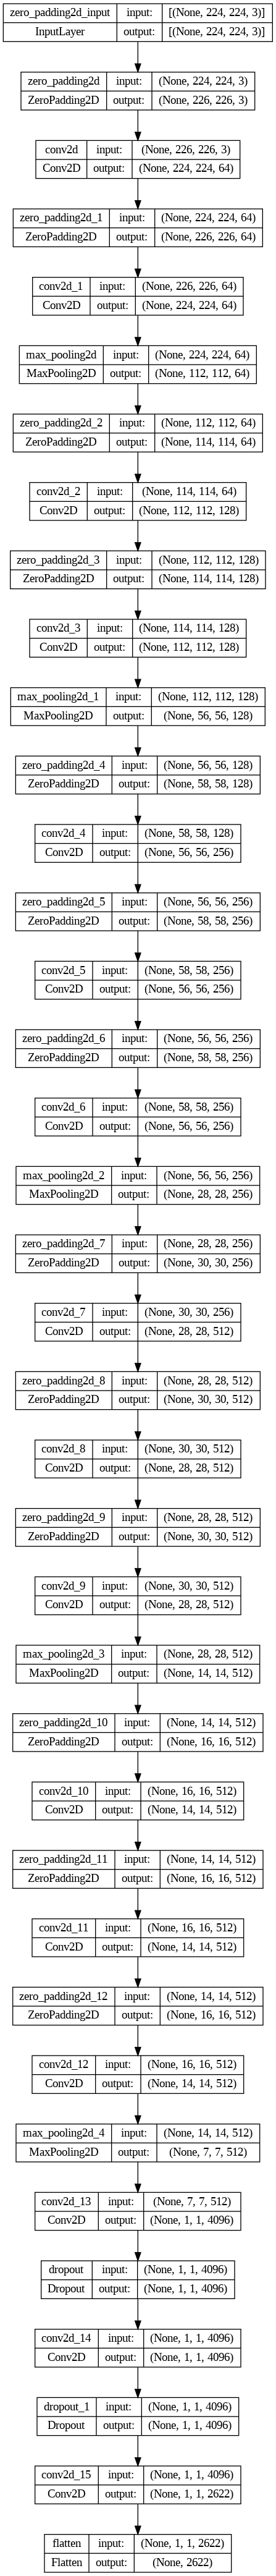

In [20]:
plot_model(vgg_face_descriptor, show_shapes=True)

# Extracting Features

In [21]:
IMG_SIZE = 224
def feature_extractor(image_path):
    image = tf.io.decode_jpeg(tf.io.read_file(image_path), channels=3)
    image = tf.cast(tf.image.resize(image, [IMG_SIZE, IMG_SIZE]), dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)
    image = preprocess_input(image)
    result = vgg_face_descriptor.predict(image)[0,:]
    return result

In [22]:
feature_list = []
for image in images_paths:
  features = feature_extractor(image)
  feature_list.append(features)

1/1 [==============================] - 1s 581ms/step


# Saving Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.models import Model, load_model

In [40]:
model.save("Image_Feature_extractor")

In [7]:
loaded_model = load_model("Image_Feature_extractor")

In [26]:
with open('features.pkl', 'wb') as f:
    pickle.dump(feature_list, f)

In [ ]:
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(images_paths, f)

In [3]:
! cp -r /content/Image_Feature_extractor /content/drive/MyDrive
! cp -r /content/feature_list /content/drive/MyDrive
! cp -r /content/images_paths /content/drive/MyDrive

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

tflite_output_path = "Image_Feature_extractor.tflite"
with open(tflite_output_path, "wb") as f:
    f.write(tflite_model)

In [ ]:
model_path = "/content/Image_Feature_extractor.tflite"
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


image_path = "/content/dataset/dataset/Abhishek_Bachchan/Abhishek_Bachchan.115.jpg"
image = tf.io.decode_png(tf.io.read_file(image_path), channels=3)
image = tf.cast(tf.image.resize(image, [224, 224]), dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

interpreter.set_tensor(input_details[0]['index'], image)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

print(f"Predicted Features Shape: {output_data.shape}")

In [4]:
! pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub.keras_mixin import push_to_hub_keras
push_to_hub_keras(model = loaded_model, repo_id = "DriveMyScream/Face_Image_Feature_extractor")

In [ ]:
from huggingface_hub import from_pretrained_keras
loaded_model = from_pretrained_keras("DriveMyScream/Face_Image_Feature_extractor")

# Finding Similarity

In [ ]:
IMG_SIZE = 224
def feature_extractor(image_path):
    image = tf.io.decode_jpeg(tf.io.read_file(image_path), channels=3)
    image = tf.cast(tf.image.resize(image, [IMG_SIZE, IMG_SIZE]), dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)
    image = preprocess_input(image)
    result = vgg_face_descriptor.predict(image)[0,:]
    return result

feature_list = np.array(feature_list)

In [ ]:
with open('my_list.pkl', 'rb') as f:
    loaded_features = pickle.load(f)

In [27]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [32]:
def recommend(loaded_features, num_recommendations=5):
    similarity = []
    for i in range(len(feature_list)):
        similarity.append(findCosineSimilarity(loaded_features, feature_list[i]))
    sorted_indices = sorted(range(len(similarity)), key=lambda i: similarity[i], reverse=True)
    top_indices = sorted_indices[:num_recommendations]
    return top_indices

In [ ]:
path = "/content/dataset/dataset/Abhishek_Bachchan/Abhishek_Bachchan.115.jpg"
features = feature_extractor(path)
indices = recommend(features)
selected_paths = [images_paths[i] for i in indices]

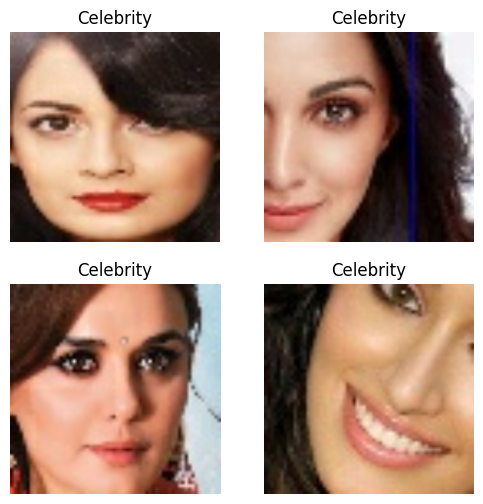

In [38]:
plt.figure(figsize=(6, 6))
for i in range(4):
  plt.subplot(2, 2, i+1, xticks=[], yticks=[])
  image = tf.io.decode_jpeg(tf.io.read_file(selected_paths[i]), channels=3)
  image = tf.cast(tf.image.resize(image, [IMG_SIZE, IMG_SIZE]), dtype=tf.float32)
  plt.imshow(image/255)
  plt.title("Celebrity")
  plt.axis('off')